# 이동평균 (MA, Moving Average)
## 개요
MA 모델은 과거 시점의 오차 항들이 현재 시점의 값에 영향을 준다고 가정하여, 과거의 오차 항들을 이용해 현재 값을 예측.

## 수식
<img src="../assets/imgs/MA_math.png">


## 실습 (코드)

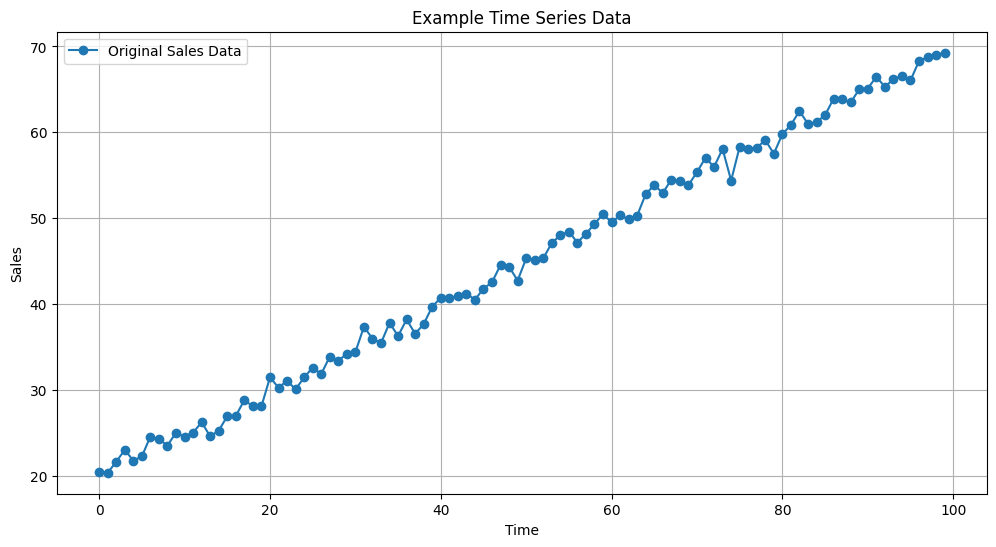

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  100
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -271.922
Date:                Wed, 09 Oct 2024   AIC                            553.844
Time:                        16:13:25   BIC                            566.869
Sample:                             0   HQIC                           559.115
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.7813      1.856     24.134      0.000      41.145      48.418
ma.L1          1.6570      0.080     20.675      0.000       1.500       1.814
ma.L2          1.6073      0.119     13.527      0.0

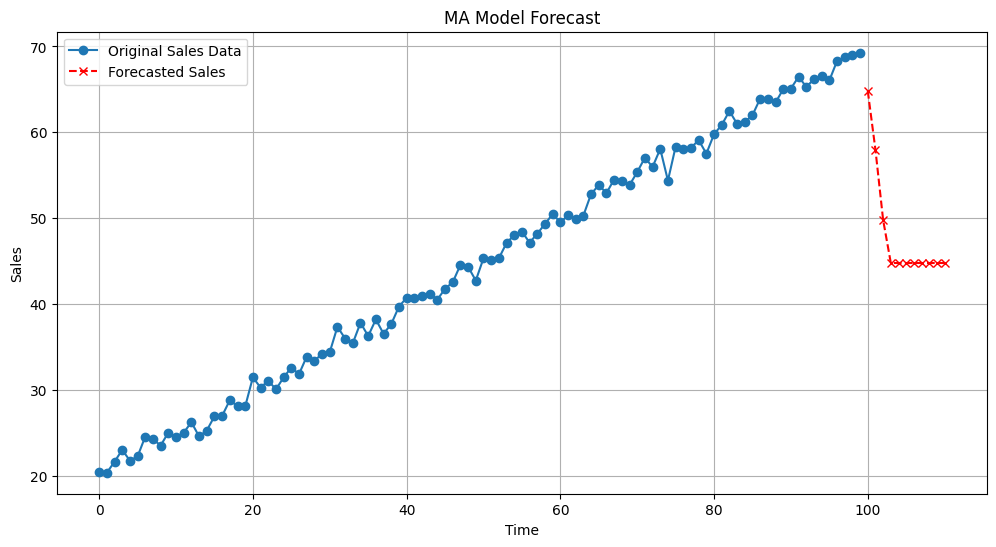

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. 예시 데이터 생성 (랜덤 시계열 데이터)
np.random.seed(42)  # 재현 가능성을 위한 시드 값 설정
n = 100  # 데이터 포인트 수
noise = np.random.normal(0, 1, n)  # 평균 0, 표준편차 1의 노이즈 생성
data = pd.Series(20 + 0.5 * np.arange(n) + noise, name='Sales')  # 트렌드가 있는 데이터 생성

# 2. 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Sales Data', marker='o')
plt.title('Example Time Series Data')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

# 3. MA 모형 학습
# 차수 설정: (p, d, q) 중에서 p와 d를 0으로 설정하여 MA(q) 모형을 구현
q_value = 3  # 이동 평균 모형의 차수 (예: 3)
ma_model = ARIMA(data, order=(0, 0, q_value)).fit()

# 4. 모델 요약
print(ma_model.summary())

# 5. 예측 수행
forecast_start = len(data)  # 예측 시작점 (현재 데이터 끝부분)
forecast_end = forecast_start + 10  # 예측 종료점 (현재 데이터 이후 10개 포인트 예측)
forecast = ma_model.predict(start=forecast_start, end=forecast_end)

# 6. 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Sales Data', marker='o')
plt.plot(forecast, label='Forecasted Sales', marker='x', linestyle='--', color='red')
plt.title('MA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()
